In [2]:
import sqlite3
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Pull Data

In [3]:
conn = sqlite3.connect('/Users/nickospelt/Documents/App_Projects/PGA_Score_Predictor/Data/PGA_SQL_DB/PGA.db')

player_tournament_query = """SELECT *,
 (CASE 
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%MASTERS%" THEN 1.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%U.S. OPEN%" THEN 2.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%THE OPEN%" THEN 3.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%PGA%" THEN 4.0
     WHEN UPPER(TOURNAMENT_NAME) LIKE "%PLAYERS%" THEN 5.0
  END) / 5 AS TOURNAMENT_F,
  (R1_SCORE + R2_SCORE + R3_SCORE + R4_SCORE) AS TOTAL_SCORE,
  (R1_TEMP + R2_TEMP + R3_TEMP + R4_TEMP) / 4 AS AVG_TEMP,
  (R1_PRECIP + R2_PRECIP + R3_PRECIP + R4_PRECIP) / 4 AS AVG_PRECIP,
  (R1_WIND_SPEED + R2_WIND_SPEED + R3_WIND_SPEED + R4_WIND_SPEED) / 4 AS AVG_WIND_SPEED
FROM PLAYER_TOURNAMENT_RESULTS"""

raw_player_tournament_df = pd.read_sql_query(player_tournament_query, conn)
raw_player_tournament_df

,TOURNAMENT_NAME,R1_TEMP,R1_PRECIP,R1_WIND_SPEED,R1_WIND_DIRECT,R2_TEMP,R2_PRECIP,R2_WIND_SPEED,R2_WIND_DIRECT,R3_TEMP,...,PUTTS_PER_ROUND,R1_SCORE,R2_SCORE,R3_SCORE,R4_SCORE,TOURNAMENT_F,TOTAL_SCORE,AVG_TEMP,AVG_PRECIP,AVG_WIND_SPEED
0,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,26.00,69,66,67,71,0.2,273,58.725,0.0925,12.750
1,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,28.25,70,72,65,67,0.2,274,58.725,0.0925,12.750
2,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,29.25,66,74,71,64,0.2,275,58.725,0.0925,12.750
3,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,28.00,75,68,65,69,0.2,277,58.725,0.0925,12.750
4,2018 Masters Tournament,56.5,0.000,10.0,0,61.3,0.0,12.8,185,65.6,...,30.50,73,69,68,69,0.2,279,58.725,0.0925,12.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,29.75,68,73,77,74,0.4,292,66.125,0.0040,10.925
1725,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,31.75,70,72,75,76,0.4,293,66.125,0.0040,10.925
1726,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,30.75,69,73,78,74,0.4,294,66.125,0.0040,10.925
1727,2023 U.S. Open,64.2,0.016,8.6,197,66.5,0.0,11.9,238,67.0,...,31.00,70,72,74,79,0.4,295,66.125,0.0040,10.925


In [4]:
query = """SELECT DISTINCT TOURNAMENT_NAME,ELEVATION,R1_TEMP, R1_PRECIP, R1_WIND_SPEED, R2_TEMP, R2_PRECIP, R2_WIND_SPEED, R3_TEMP, R3_PRECIP, R3_WIND_SPEED,R4_TEMP, R4_PRECIP, R4_WIND_SPEED
FROM PLAYER_TOURNAMENT_RESULTS
WHERE UPPER(TOURNAMENT_NAME) LIKE \"%PLAYERS%\""""

weather_df = pd.read_sql_query(query, conn)
weather_df

,TOURNAMENT_NAME,ELEVATION,R1_TEMP,R1_PRECIP,R1_WIND_SPEED,R2_TEMP,R2_PRECIP,R2_WIND_SPEED,R3_TEMP,R3_PRECIP,R3_WIND_SPEED,R4_TEMP,R4_PRECIP,R4_WIND_SPEED
0,2018 The Players Championship,6.0,71.1,0.000,9.7,75.4,0.000,9.1,74.7,0.000,12.5,72.6,0.004,9.0
1,2019 THE PLAYERS Championship,6.0,67.7,0.000,13.4,69.2,0.000,11.8,65.1,0.008,10.8,59.7,0.177,13.9
2,2021 THE PLAYERS Championship,6.0,63.2,0.000,9.5,63.0,0.000,7.8,64.2,0.000,8.3,65.9,0.000,9.2
3,2022 THE PLAYERS Championship,6.0,68.5,0.693,9.5,66.6,0.531,9.2,65.2,0.929,19.9,46.9,0.000,16.1
4,2023 THE PLAYERS Championship,6.0,65.2,0.000,10.6,67.4,0.232,13.4,62.0,0.012,12.2,66.3,0.000,15.8


- Weather can make a round more difficult, but only generally if the either the wind or precipitation is extreme
- Having it on a per_round basis is usefully, but some how quantifying the amount of weather affect is probably more useful (i.e. summing them all together, weighted average somehow)

## Observe Distribution of Scores

In [5]:
print(f"Round 1: Mean: {raw_player_tournament_df['R1_SCORE'].mean()}, STD: {raw_player_tournament_df['R1_SCORE'].std()}")
print(f"Round 2: Mean: {raw_player_tournament_df['R2_SCORE'].mean()}, STD: {raw_player_tournament_df['R2_SCORE'].std()}")
print(f"Round 3: Mean: {raw_player_tournament_df['R3_SCORE'].mean()}, STD: {raw_player_tournament_df['R3_SCORE'].std()}")
print(f"Round 4: Mean: {raw_player_tournament_df['R4_SCORE'].mean()}, STD: {raw_player_tournament_df['R4_SCORE'].std()}")

Round 1: Mean: 71.10005783689994, STD: 2.5596687152516715
Round 2: Mean: 70.57316367842684, STD: 2.5807552990524667
Round 3: Mean: 71.74725274725274, STD: 3.137525771857176
Round 4: Mean: 71.65587044534414, STD: 3.2079042746094735


# Correlation Between Weather and Golf Scores

In [13]:
# Create weather feature (Weighted average of temp, precipiation, and wind speed)
def weather_weighted_average(temp, precip, wind_speed):
    weights = [0.3, 0.3, 0.4]
    return (temp * weights[0] + precip * weights[1] + wind_speed * weights[2]) / (weights[0] + weights[1] + weights[2])

scaler = StandardScaler()
raw_player_tournament_df[['R1_TEMP', 'R1_PRECIP', 'R1_WIND_SPEED', 
'R2_TEMP', 'R2_PRECIP', 'R2_WIND_SPEED', 
'R3_TEMP', 'R3_PRECIP', 'R3_WIND_SPEED', 
'R4_TEMP', 'R4_PRECIP', 'R4_WIND_SPEED']] = scaler.fit_transform(raw_player_tournament_df[['R1_TEMP', 'R1_PRECIP', 'R1_WIND_SPEED', 
'R2_TEMP', 'R2_PRECIP', 'R2_WIND_SPEED', 
'R3_TEMP', 'R3_PRECIP', 'R3_WIND_SPEED', 
'R4_TEMP', 'R4_PRECIP', 'R4_WIND_SPEED']])

raw_player_tournament_df['R1_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R1_TEMP'], row['R1_PRECIP'], row['R1_WIND_SPEED']), axis=1)
raw_player_tournament_df['R2_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R2_TEMP'], row['R2_PRECIP'], row['R2_WIND_SPEED']), axis=1)
raw_player_tournament_df['R3_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R3_TEMP'], row['R3_PRECIP'], row['R3_WIND_SPEED']), axis=1)
raw_player_tournament_df['R4_WEATHER_FACTOR'] = raw_player_tournament_df.apply(lambda row:
    weather_weighted_average(row['R4_TEMP'], row['R4_PRECIP'], row['R4_WIND_SPEED']), axis=1)

raw_player_tournament_df

,TOURNAMENT_NAME,R1_TEMP,R1_PRECIP,R1_WIND_SPEED,R1_WIND_DIRECT,R2_TEMP,R2_PRECIP,R2_WIND_SPEED,R2_WIND_DIRECT,R3_TEMP,...,R4_SCORE,TOURNAMENT_F,TOTAL_SCORE,AVG_TEMP,AVG_PRECIP,AVG_WIND_SPEED,R1_WEATHER_FACTOR,R2_WEATHER_FACTOR,R3_WEATHER_FACTOR,R4_WEATHER_FACTOR
0,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,0,-0.698112,-0.627097,0.125666,185,0.187288,...,71,0.2,273,58.725,0.0925,12.750,-0.691510,-0.347296,0.174633,-0.288896
1,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,0,-0.698112,-0.627097,0.125666,185,0.187288,...,67,0.2,274,58.725,0.0925,12.750,-0.691510,-0.347296,0.174633,-0.288896
2,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,0,-0.698112,-0.627097,0.125666,185,0.187288,...,64,0.2,275,58.725,0.0925,12.750,-0.691510,-0.347296,0.174633,-0.288896
3,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,0,-0.698112,-0.627097,0.125666,185,0.187288,...,69,0.2,277,58.725,0.0925,12.750,-0.691510,-0.347296,0.174633,-0.288896
4,2018 Masters Tournament,-1.238719,-0.330632,-0.551762,0,-0.698112,-0.627097,0.125666,185,0.187288,...,69,0.2,279,58.725,0.0925,12.750,-0.691510,-0.347296,0.174633,-0.288896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,2023 U.S. Open,-0.161016,-0.215934,-0.955460,197,0.075143,-0.627097,-0.116200,238,0.414486,...,74,0.4,292,66.125,0.0040,10.925,-0.495269,-0.212066,-0.133898,-0.192212
1725,2023 U.S. Open,-0.161016,-0.215934,-0.955460,197,0.075143,-0.627097,-0.116200,238,0.414486,...,76,0.4,293,66.125,0.0040,10.925,-0.495269,-0.212066,-0.133898,-0.192212
1726,2023 U.S. Open,-0.161016,-0.215934,-0.955460,197,0.075143,-0.627097,-0.116200,238,0.414486,...,74,0.4,294,66.125,0.0040,10.925,-0.495269,-0.212066,-0.133898,-0.192212
1727,2023 U.S. Open,-0.161016,-0.215934,-0.955460,197,0.075143,-0.627097,-0.116200,238,0.414486,...,79,0.4,295,66.125,0.0040,10.925,-0.495269,-0.212066,-0.133898,-0.192212


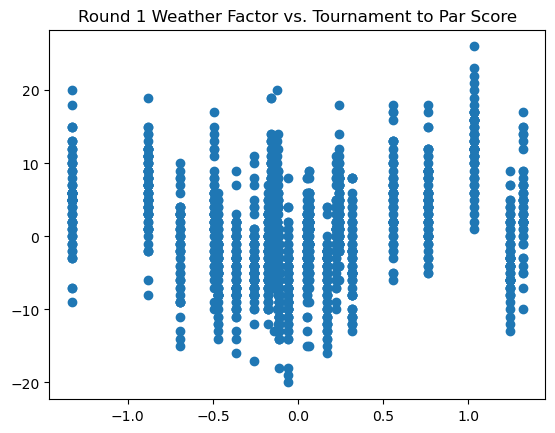

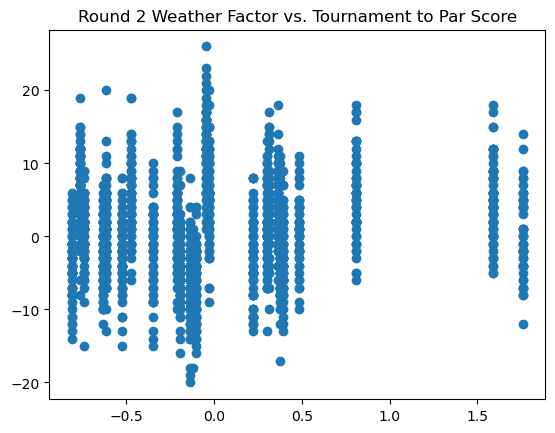

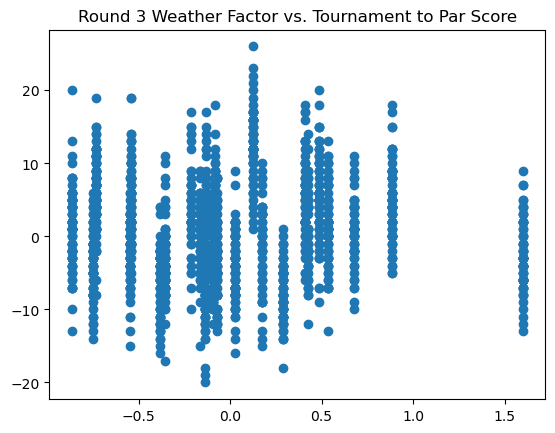

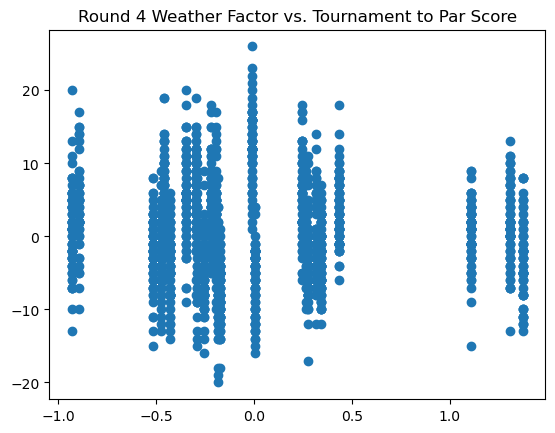

In [27]:
plt.scatter(raw_player_tournament_df['R1_WEATHER_FACTOR'], (raw_player_tournament_df['TOTAL_SCORE'] - (raw_player_tournament_df['PAR'] * 4)))
plt.title('Round 1 Weather Factor vs. Tournament to Par Score')
plt.show()

plt.scatter(raw_player_tournament_df['R2_WEATHER_FACTOR'], (raw_player_tournament_df['TOTAL_SCORE'] - (raw_player_tournament_df['PAR'] * 4)))
plt.title('Round 2 Weather Factor vs. Tournament to Par Score')
plt.show()

plt.scatter(raw_player_tournament_df['R3_WEATHER_FACTOR'], (raw_player_tournament_df['TOTAL_SCORE'] - (raw_player_tournament_df['PAR'] * 4)))
plt.title('Round 3 Weather Factor vs. Tournament to Par Score')
plt.show()

plt.scatter(raw_player_tournament_df['R4_WEATHER_FACTOR'], (raw_player_tournament_df['TOTAL_SCORE'] - (raw_player_tournament_df['PAR'] * 4)))
plt.title('Round 4 Weather Factor vs. Tournament to Par Score')
plt.show()

- A larger weather factor for a round results in larger tournament scores to par (i.e. -10 means 10 under for the tournament).

# Correlation Between Player Statistics and Score

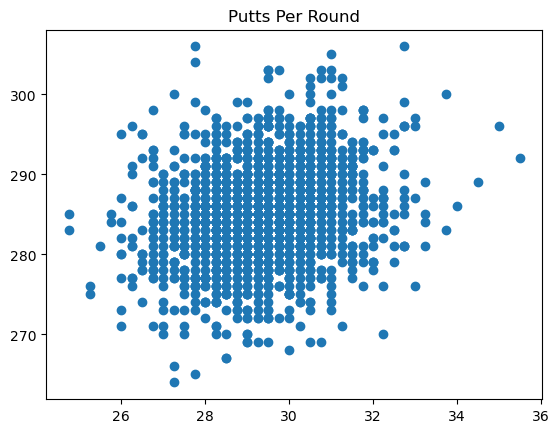

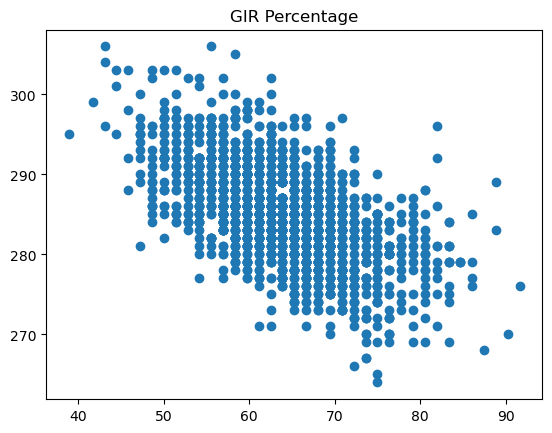

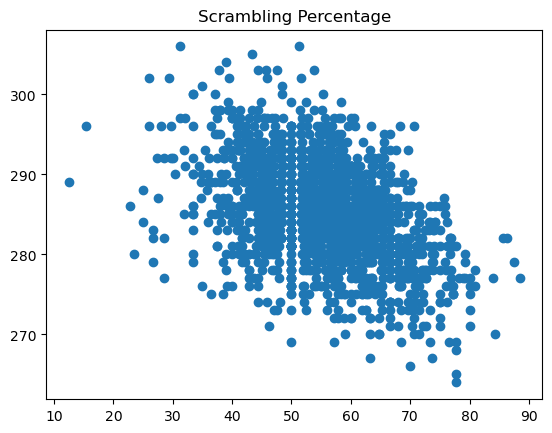

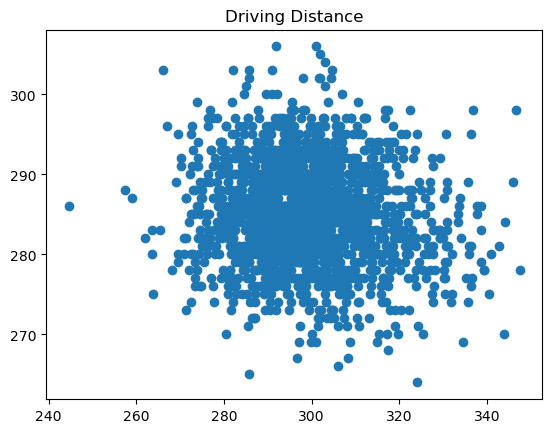

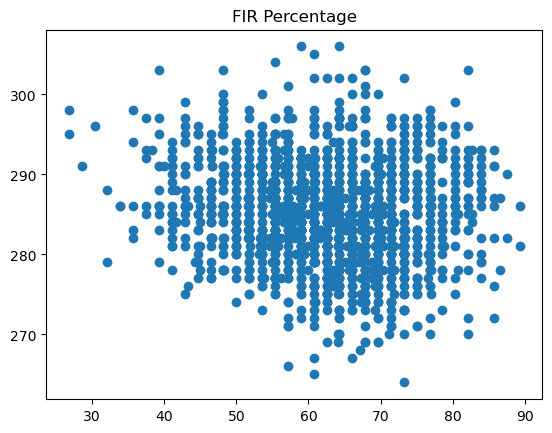

In [18]:
plt.scatter(raw_player_tournament_df['PUTTS_PER_ROUND'], raw_player_tournament_df['TOTAL_SCORE'])
plt.title("Putts Per Round")
plt.show()

plt.scatter(raw_player_tournament_df['GIR_PERCENTAGE'], raw_player_tournament_df['TOTAL_SCORE'])
plt.title("GIR Percentage")
plt.show()

plt.scatter(raw_player_tournament_df['SCRAMBLING_PERCENTAGE'], raw_player_tournament_df['TOTAL_SCORE'])
plt.title("Scrambling Percentage")
plt.show()

plt.scatter(raw_player_tournament_df['TOTAL_DRIVING_DISTANCE'], raw_player_tournament_df['TOTAL_SCORE'])
plt.title("Driving Distance")
plt.show()

plt.scatter(raw_player_tournament_df['FIR_PERCENTAGE'], raw_player_tournament_df['TOTAL_SCORE'])
plt.title("FIR Percentage")
plt.show()

- GIR, Scrambling, and Putting seem to have the highest correlation between the statistic and the score.
- FIR and Driving Distance not so much.

## Driving Distance and FIR vs. GIR Percentage

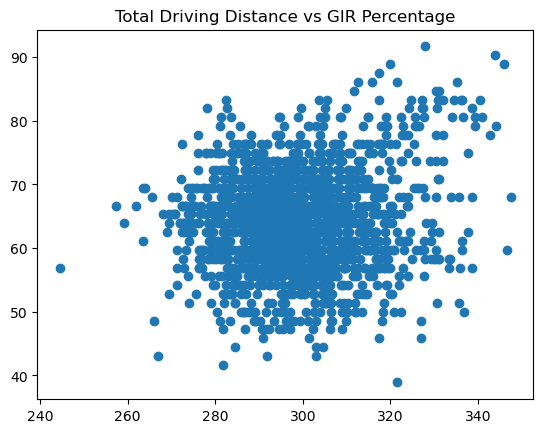

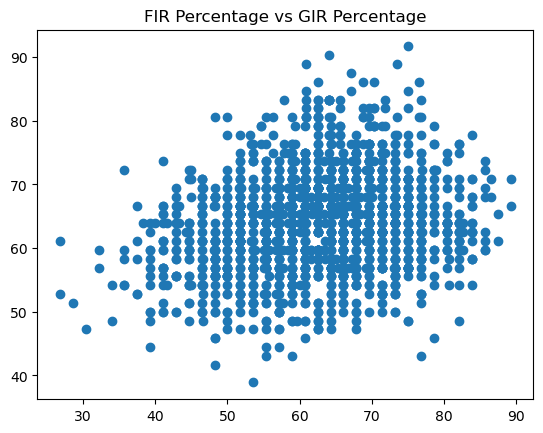

In [21]:
plt.scatter(raw_player_tournament_df['TOTAL_DRIVING_DISTANCE'], raw_player_tournament_df['GIR_PERCENTAGE'])
plt.title("Total Driving Distance vs GIR Percentage")
plt.show()

plt.scatter(raw_player_tournament_df['FIR_PERCENTAGE'], raw_player_tournament_df['GIR_PERCENTAGE'])
plt.title("FIR Percentage vs GIR Percentage")
plt.show()

- FIR Percentage and Driving distance could have some correlation with GIR Percentage.
- Since these don't have as much of correlation to score, use these two to improve the quality of GIR Percentage feature.

## Scrambling vs Putts Per Round

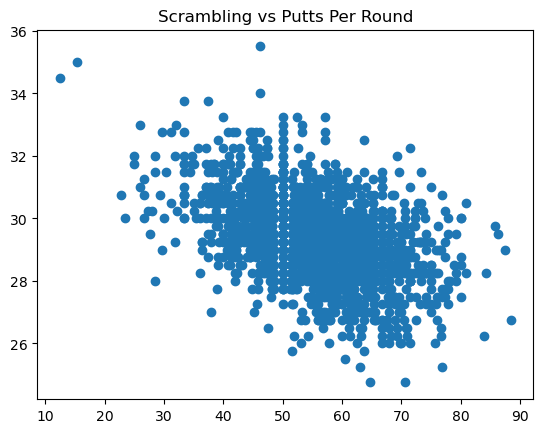

In [20]:
plt.scatter(raw_player_tournament_df['SCRAMBLING_PERCENTAGE'], raw_player_tournament_df['PUTTS_PER_ROUND'])
plt.title("Scrambling vs Putts Per Round")
plt.show()

- It makes sense that scrambling is inversly related to putting.
- However, since there is also a correlation between score and scrambling. Will use this as its own feature.